# Test: Minimum error discrimination

In this notebook we are testing the evolution of the error probability with the number of evaluations.

In [1]:
import sys 
sys.path.append('../')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit.algorithms.optimizers import SPSA
from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd
from quantum_state import QuantumState 

plt.style.use('ggplot')

In [2]:
def callback(params, results, prob_error, prob_inc, prob):
    data.append(prob_error)

In [3]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = [0], [pi]
th_v1, th_v2 = [0], [0]
fi_v1, fi_v2 = [0], [0]
lam_v1, lam_v2 = [0], [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)
optimal = nnd.helstrom_bound(ψ, ϕ)

print(f'Optimal results: {optimal}\nActual results: {results}')

Optimal results: 0.21814357068279477
Actual results: (array([-0.95709317, -0.71250405, -0.94137331, -0.01530452,  3.15689142,
       -0.53540926,  1.38709225, -1.41810188, -0.30033464, -0.00887378,
        0.47919951]), 0.2333984375, 200)


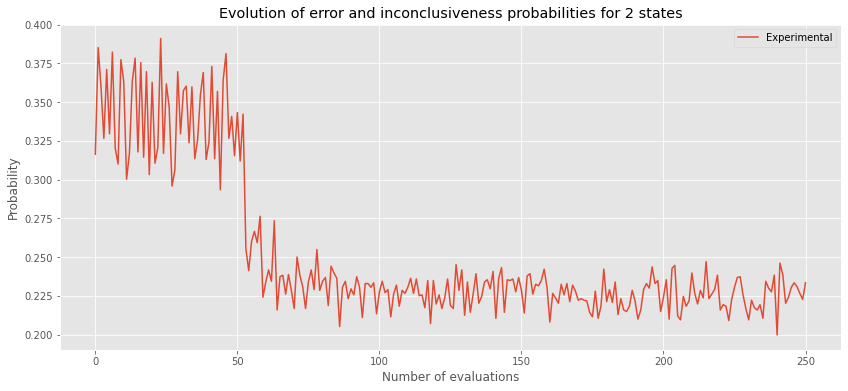

In [4]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error and inconclusiveness probabilities for 2 states')
plt.show()

In [5]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)
χ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ, χ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Actual results: (array([ 0.82184239,  3.62007619,  3.94915031,  3.11096846, -0.37820084,
        0.80455367,  2.30571216,  0.5266372 , -4.71678736,  0.09903287,
        2.5294273 ,  2.73157885, -5.31875977,  2.09688057, -3.05403643,
       -1.33411767,  2.14223722, -1.79752159,  0.79477685]), 0.5960286458333334, 200)


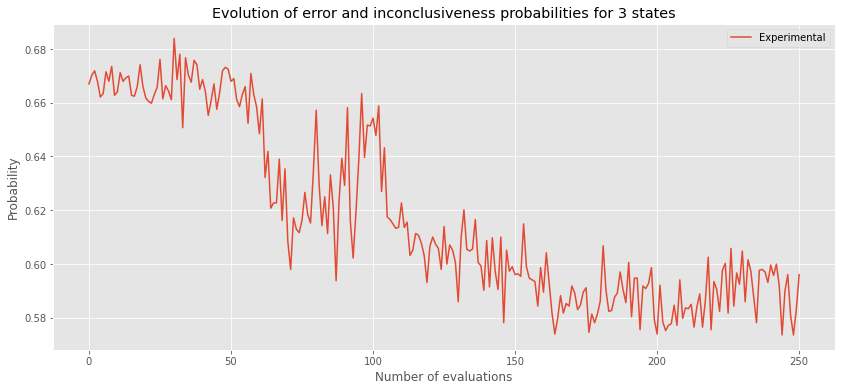

In [6]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error and inconclusiveness probabilities for 3 states')
plt.show()

In [7]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(2)
χ = QuantumState.random(3)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ, χ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Actual results: (array([-1.32117212,  0.08032084,  1.17006222, -0.04399119,  0.00993225,
        3.19189693,  2.46434884,  1.74569503, -3.02599812, -2.90849036,
       -2.87009744,  0.71986772,  2.00778193, -1.31084534, -1.55034663,
       -0.45666393, -1.45780624,  2.13437148, -1.94993051]), 0.4586046006944444, 200)


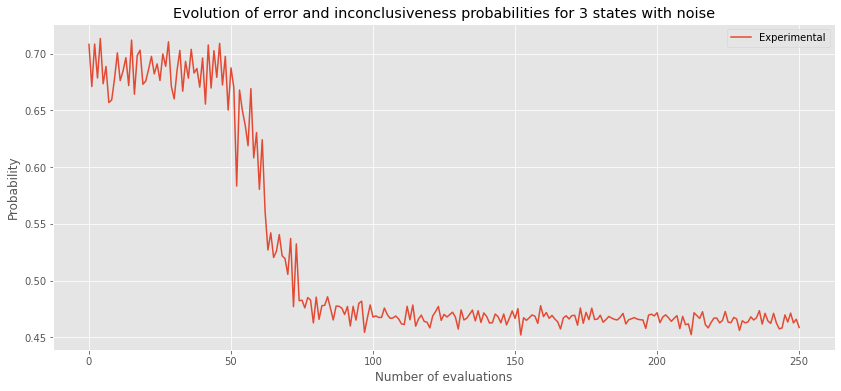

In [8]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error and inconclusiveness probabilities for 3 states with noise')
plt.show()